# Simulation 1.1 - Analyzing the agents


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent as agn

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

exploration_train = 0.1
exploration_test = 0
learningrate = 0.1
discount = 0.9
max_steps = 1000

flag_reward = 10
query_reward = -1

## Loading the statistics

In [4]:
train_data = joblib.load('ignore_simul1_traindata_20230617221402399323.pkl')
test_data = joblib.load('ignore_simul1_testdata_20230617221402399323.pkl')

## Analyzing the agent

### Training: number of states

Plotting the evolution in the number of states (average and standard deviation over 10 repetitions).

In [5]:
0.1*np.arange(0,n_episodes_training)+2*10**6

array([2000000. , 2000000.1, 2000000.2, ..., 2099999.7, 2099999.8,
       2099999.9])

In [6]:
params = np.polyfit(range(200000, n_episodes_training), np.mean(train_data[:,2,200000:],axis=0),1)

Linear regression params: slope = 4.8516363875925705 ; intercept = 1484299.9991898993


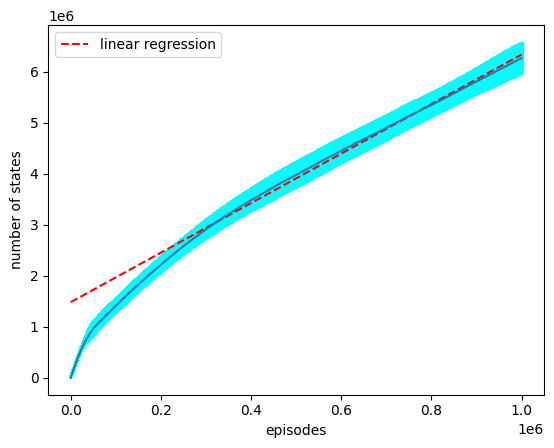

In [7]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,2,:],axis=0),yerr=np.std(train_data[:,2,:],axis=0),ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of states')

params = np.polyfit(range(200000, n_episodes_training), np.mean(train_data[:,2,200000:],axis=0),1)
plt.plot(range(n_episodes_training), np.arange(n_episodes_training)*params[0]+params[1], c='red',ls='--',label='linear regression')
plt.legend()

print('Linear regression params: slope = {0} ; intercept = {1}'.format(params[0],params[1]))

### Training: number of steps

We first plot the number of steps (average and standard deviation over 10 repetitions)

### Training: number of steps

We first plot the number of steps (average and standard deviation over 10 repetitions)

Text(0, 0.5, 'number of steps per episode')

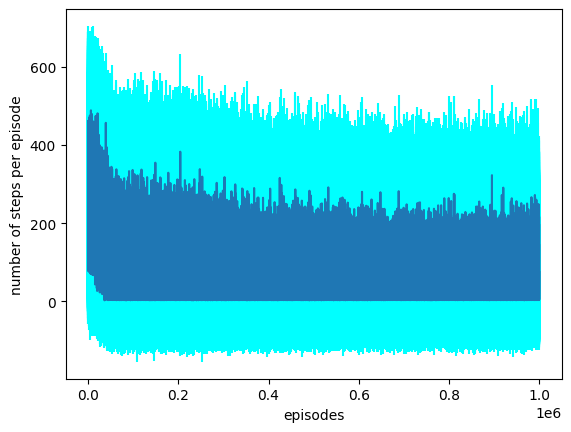

In [8]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,0,:],axis=0),yerr=np.std(train_data[:,0,:],axis=0),ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of steps per episode')

We then smooth with a $1000$-step window each repetition, then we compute mean and standard deviation in number of steps.

Text(0, 0.5, 'number of steps per episode')

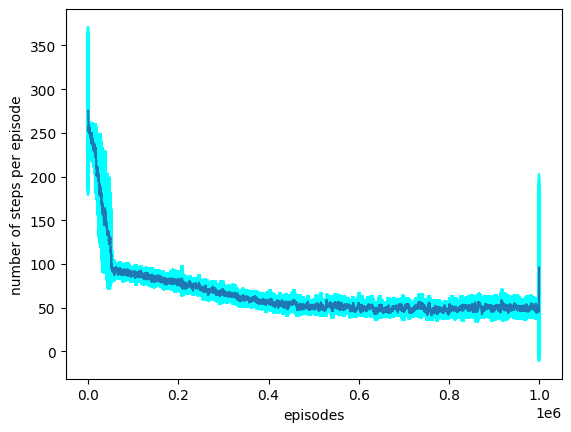

In [9]:
mean_smmothed = np.mean(uniform_filter1d(train_data[:,0,:],axis=1,size=1000,mode='nearest'),axis=0)
std_smmothed = np.std(uniform_filter1d(train_data[:,0,:],axis=1,size=1000,mode='nearest'),axis=0)

plt.errorbar(range(n_episodes_training),mean_smmothed,yerr=std_smmothed,ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of steps per episode')

### Training: total number of steps

We compute the total number of steps taken by each agent.

Average total number of steps: 65950145.2


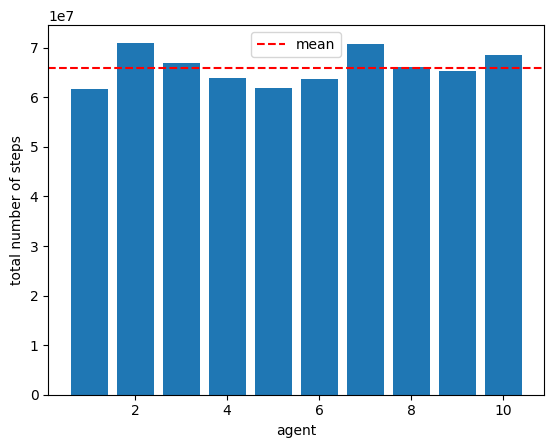

In [10]:
total_steps = np.sum(train_data[:,0,:],axis=1)

plt.bar(range(1,n_simulations+1), total_steps)
plt.axhline(np.mean(total_steps),c='red',ls='--',label='mean')
plt.legend()
plt.xlabel('agent')
plt.ylabel('total number of steps')

print('Average total number of steps: {0}'.format(np.mean(total_steps)))

### Test: number of steps

We first plot the number of steps (average and standard deviation over 10 repetitions)

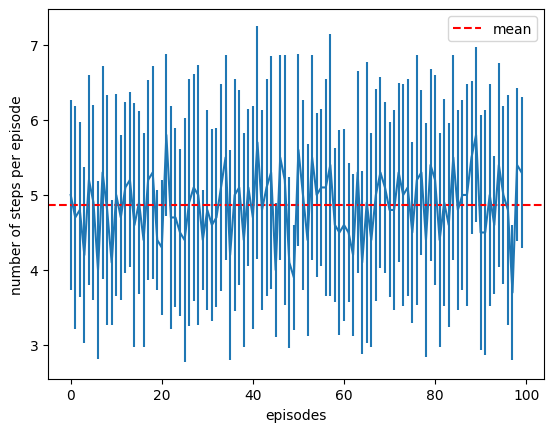

In [11]:
plt.errorbar(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0),yerr=np.std(test_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps per episode')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.legend()